In [191]:
import pandas as pd

### Data Collection

In [192]:
import requests

# URLs of the files
train_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv'
test_data_url = 'https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv'

# Function to download a file
def download_file(url, file_name):
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses
    with open(file_name, 'wb') as file:
        file.write(response.content)
    print(f'Downloaded {file_name} from {url}')

# Downloading the files
download_file(train_data_url, 'module3_exercise_train.csv')
download_file(test_data_url, 'module3_exercise_test.csv')

Downloaded module3_exercise_train.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_train.csv
Downloaded module3_exercise_test.csv from https://www.raphaelcousin.com/modules/module3/exercise/module3_exercise_test.csv


In [193]:
df_train =  pd.read_csv("module3_exercise_train.csv", sep=",", index_col='id')

In [194]:
df_train

,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
id,,,,,,,,,,,,,,,,,
254,2,1,4.0,1,1977.0,two,440,0,55,0,0,165,0,0,7,2010.0,127500
1066,1,1,5.0,1,1983.0,two,612,349,40,0,0,0,0,0,9,2009.0,316600
638,4,1,10.0,1,1998.0,two,420,144,123,0,0,0,0,0,7,2006.0,258000
799,3,1,8.0,0,1916.0,one,180,0,0,0,140,0,0,0,8,2009.0,135000
380,2,1,5.0,0,2005.0,two,438,108,0,0,0,0,0,0,3,2006.0,167240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,4,1,7.0,0,-1.0,zero,0,0,192,0,0,0,0,0,11,2008.0,130000
1130,3,1,6.0,0,1964.0,two,504,0,0,0,0,0,0,0,7,2008.0,145000
1294,3,1,7.0,1,1996.0,three,889,220,0,0,0,0,0,0,7,2009.0,265000


In [195]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1168 entries, 254 to 1126
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   1168 non-null   int64  
 1   KitchenAbvGr   1168 non-null   int64  
 2   TotRmsAbvGrd   1167 non-null   float64
 3   Fireplaces     1168 non-null   int64  
 4   GarageYrBlt    1168 non-null   float64
 5   GarageCars     1167 non-null   object 
 6   GarageArea     1168 non-null   int64  
 7   WoodDeckSF     1168 non-null   int64  
 8   OpenPorchSF    1168 non-null   int64  
 9   EnclosedPorch  1168 non-null   int64  
 10  3SsnPorch      1168 non-null   int64  
 11  ScreenPorch    1168 non-null   int64  
 12  PoolArea       1168 non-null   int64  
 13  MiscVal        1168 non-null   int64  
 14  MoSold         1168 non-null   int64  
 15  YrSold         1167 non-null   float64
 16  SalePrice      1168 non-null   int64  
dtypes: float64(3), int64(13), object(1)
memory usage: 164.2

### Data Preprocessing

In [196]:
def data_prep(data_df):
    #Delete rows containing missing values
    data_df.dropna(inplace=True)

    #handle outliers in the GarageYrBlt column
    GYB_mean=data_df['GarageYrBlt'][data_df['GarageYrBlt']!=-1].mean()
    data_df['GarageYrBlt']=data_df['GarageYrBlt'].replace(-1,GYB_mean)

    #Delete the GarageCars column
    data_df.drop(columns=['GarageCars'], inplace=True, errors='ignore')
    data_df.drop(columns=['PoolArea'], inplace=True, errors='ignore')
    data_df.drop(columns=['MiscVal'], inplace=True, errors='ignore')


    return data_df

In [197]:
df_train=data_prep(df_train)

### Model Building and Evaluation

In [198]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

In [199]:
y=df_train['SalePrice']
X=df_train[['BedroomAbvGr','KitchenAbvGr','TotRmsAbvGrd','Fireplaces','GarageYrBlt','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','MoSold','YrSold']]

In [200]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [201]:
degree=2
poly=PolynomialFeatures(degree)
X_poly=poly.fit_transform(X_train)

model=LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [202]:
def pred_eval(model,X_data,y_target):
    y_pred=model.predict(X_data)
    mae = mean_absolute_error(y_target, y_pred)
    return print("Mean Absolute Error (MAE):", mae)

In [203]:
pred_eval(model,X_poly,y_train)

Mean Absolute Error (MAE): 26777.35557831639


**Insights:**

The mean absolute error obtained on both the training and test sets is less than the error threshold of 34,000, indicating that the model performs well.

### Generating Submission File

In [204]:
#Data Collection and Preprocessing
X_test = pd.read_csv("module3_exercise_test.csv", sep=",", index_col='id')
X_test.drop(columns=['GarageCars'], inplace=True, errors='ignore')

In [205]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   292 non-null    int64  
 1   KitchenAbvGr   292 non-null    int64  
 2   TotRmsAbvGrd   292 non-null    int64  
 3   Fireplaces     291 non-null    float64
 4   GarageYrBlt    292 non-null    float64
 5   GarageArea     292 non-null    int64  
 6   WoodDeckSF     292 non-null    int64  
 7   OpenPorchSF    292 non-null    int64  
 8   EnclosedPorch  291 non-null    float64
 9   3SsnPorch      292 non-null    int64  
 10  ScreenPorch    292 non-null    int64  
 11  PoolArea       292 non-null    int64  
 12  MiscVal        292 non-null    int64  
 13  MoSold         292 non-null    int64  
 14  YrSold         292 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 36.5 KB


Among all variables, TotRmsAbvGrd has a relatively high correlation with Fireplaces. Therefore, we will group by TotRmsAbvGrd and use the average value of each group to fill the missing values in the Fireplaces column.

In [206]:
X_test['Fireplaces'] = X_test.groupby('TotRmsAbvGrd')['Fireplaces'].transform(lambda x: x.fillna(x.mean()))

Since most of the data in the EnclosedPorch column is zero, we will fill the missing values with 0.

In [207]:
# Fill missing values in the EnclosedPorch column with 0
X_test['EnclosedPorch'].fillna(0, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18860\2590060227.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_test['EnclosedPorch'].fillna(0, inplace=True)


In [208]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 292 entries, 892 to 722
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   BedroomAbvGr   292 non-null    int64  
 1   KitchenAbvGr   292 non-null    int64  
 2   TotRmsAbvGrd   292 non-null    int64  
 3   Fireplaces     292 non-null    float64
 4   GarageYrBlt    292 non-null    float64
 5   GarageArea     292 non-null    int64  
 6   WoodDeckSF     292 non-null    int64  
 7   OpenPorchSF    292 non-null    int64  
 8   EnclosedPorch  292 non-null    float64
 9   3SsnPorch      292 non-null    int64  
 10  ScreenPorch    292 non-null    int64  
 11  PoolArea       292 non-null    int64  
 12  MiscVal        292 non-null    int64  
 13  MoSold         292 non-null    int64  
 14  YrSold         292 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 36.5 KB


In [209]:
GYB_mean=df_train['GarageYrBlt'][df_train['GarageYrBlt']!=-1].mean()
X_test['GarageYrBlt']=X_test['GarageYrBlt'].replace(-1,GYB_mean)
X_test.drop(columns=['PoolArea'], inplace=True, errors='ignore')
X_test.drop(columns=['MiscVal'], inplace=True, errors='ignore')
X_test.iloc[212]

BedroomAbvGr        4.0
KitchenAbvGr        1.0
TotRmsAbvGrd        8.0
Fireplaces          1.0
GarageYrBlt      1918.0
GarageArea        795.0
WoodDeckSF          0.0
OpenPorchSF        16.0
EnclosedPorch     552.0
3SsnPorch           0.0
ScreenPorch         0.0
MoSold              3.0
YrSold           2006.0
Name: 99, dtype: float64

In [210]:
X_test_poly = poly.fit_transform(X_test)
y_pred = model.predict(X_test_poly).astype(int)

submission = pd.DataFrame({
    'id': X_test.index,
    'SalePrice': y_pred
})

submission.to_csv('submission.csv', index=False, sep=',')
submission.head()

,id,SalePrice
0,892,234533
1,1105,230318
2,413,238312
3,522,289090
4,1036,149743


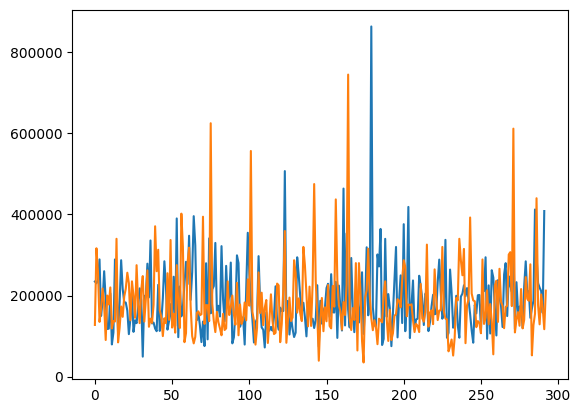

In [211]:
import matplotlib.pyplot as plt
import numpy as np

plt.plot(np.arange(len(y_pred)), y_pred, label='Predicted Sale Price')
plt.plot(np.arange(len(df_train['SalePrice'][:293])), df_train['SalePrice'][:293], label='Actual Sale Price')